In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
import pandas as pd

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
raw_ab = [-0.468156425,
            -0.469536665,
            -0.412237762,
            -0.474250576,
            -0.473564955,
            -0.567211055,
            -0.600552656,
            -0.59111378,
            -0.572317724,
            -0.563609467,
            0.883399209,
            0.834977578,
            1.007662835,
            0.959257583,
            0.901252408,
            0.89565628,
            0.19259012,
            0.026351351,
            0.074183976,
            0.143338954,
            -0.025984049,
            -0.415363698,
            -0.410076977,
            -0.400073475,
            -0.387591495,
            -0.391610738,
            -0.355336617,
            -0.177881412,
            -0.325116113,
            -0.347753186,
            -0.333648096,
            -0.42907676,
            -0.316281971,
            0.084465663,
            0.083790706,
            0.190656132,
            -0.17497779,
            -0.082743771,
            0.49616041,
            0.593888219,
            0.54477938,
            0.510420924,
            0.578094108,
            -0.037252619	,
            -0.012594458	,
            0.079597438	,
            -0.160812117	,
            -0.061984733	,
            -0.551927037	,
            -0.580558056	,
            -0.575621444	,
            -0.563951779	,
            -0.550799087	,
            0.887878788	,
            0.872207328	,
            1.020447907	,
            0.989396035	,
            0.937796521	,
            0.892976589	,
            0.44709389	,
            0.408970976	,
            0.465534805	,
            0.451253482	,
            0.41056	,
            0.033465166	,
            0.111253197	,
            0.109356015	,
            0.109548725	,
            -0.029448622	,
            0.273426573	,
            0.358208955	,
            0.325320513	,
            0.333448157	,
            0.325573315	,
            0.265217391	,
            0.327580797	,
            0.418114603	,
            0.420523139	,
            0.467180051	,
            0.275702734	,
            0.406641816	,
            0.548234438	,
            0.621752042	,
            0.618719611	,
            0.620761825	,
            0.641609719	,
         ]

In [3]:
len(raw_ab)

86

In [4]:
min(raw_ab)

-0.600552656

In [5]:
max(raw_ab)

1.020447907

In [6]:
np.random.seed(10)
label_list = []
lycopene_concentration = []
chlorophyll_concentration = []

for ab in raw_ab:
    label = 0
    lycopene_con = 0
    chlorophyll_con = 0
    if ab <= -0.44:
        label = 1
        ratio = (ab + 0.600552656)/(-0.44 + 0.600552656)
        lycopene_con = 0 + (2 - 0) * ratio
        chlorophyll_con = 50 + (45 - 50) * ratio
    elif -0.44 < ab <= -0.3:
        ratio = (ab + 0.44)/(-0.3+0.44)
        lycopene_con = 2 + (5 - 2) * ratio
        chlorophyll_con = 45 + (27 - 45) * ratio
        if ratio < 0.5:
            label = 1
        else:
            label = 2
    elif -0.3 < ab <= -0.03:
        ratio = (ab + 0.3)/(-0.03+0.3)
        lycopene_con = 5 + (10 - 5) * ratio
        chlorophyll_con = 27 + (25 - 27) * ratio
        if ratio < 0.5:
            label = 2
        else:
            label = 3
    elif -0.03 < ab <= 0.27:
        ratio = (ab + 0.03)/(0.27+0.03)
        lycopene_con = 10 + (23 - 10) * ratio
        chlorophyll_con = 25 + (12 - 25) * ratio
        if ratio < 0.5:
            label = 3
        else:
            label = 4
    elif 0.27 < ab <= 0.54:
        ratio = (ab - 0.27)/(0.54-0.27)
        lycopene_con = 23 + (32 - 23) * ratio
        chlorophyll_con = 12 + (10 - 12) * ratio
        if ratio < 0.5:
            label = 4
        else:
            label = 5
    elif 0.54 < ab <= 0.8:
        ratio = (ab - 0.54)/(0.8-0.54)
        lycopene_con = 32 + (52 - 32) * ratio
        chlorophyll_con = 10 + (5 - 10) * ratio
        if ratio < 0.5:
            label = 5
        else:
            label = 6
    elif 0.8 < ab:
        ratio = (ab - 0.8)/(1.007662835 - 0.8)
        lycopene_con = 52 + (70 - 52) * ratio
        chlorophyll_con = 5 + (2 - 5) * ratio
        label = 6
        
    for i in range(4):
        label_list.append(label)
        lycopene_concentration.append(lycopene_con)
        chlorophyll_concentration.append(chlorophyll_con)

In [7]:
len(label_list)

344

# 1. Lycopene

## 1.1. load the data

In [8]:
data_path_root = './cache/'

In [9]:
cache_dir = data_path_root + 'Tomato3/PCA_input.npy'
sample_data = np.load(cache_dir)
sample_data

array([[[ 13.6273171 ],
        [  5.57241495],
        [ 51.45106641],
        [ 29.35532792],
        [ 12.00999277],
        [  5.27725746],
        [ 10.31216234],
        [ 92.3519786 ]],

       [[ 11.8803096 ],
        [  5.00254919],
        [ 44.04709806],
        [ 25.26040775],
        [  9.56949982],
        [  4.11012798],
        [  8.82735625],
        [ 84.19827382]],

       [[ 14.69977167],
        [  6.32657962],
        [ 55.45136645],
        [ 31.67086043],
        [ 14.87408878],
        [  6.62186841],
        [ 13.20887807],
        [ 98.1777207 ]],

       [[ 15.10294796],
        [  6.3226367 ],
        [ 54.12708914],
        [ 32.4210725 ],
        [ 13.9580765 ],
        [  5.61398878],
        [ 11.34491875],
        [ 91.47400619]],

       [[ 17.63849581],
        [  7.12308291],
        [ 72.15748942],
        [ 36.55407626],
        [ 16.98419455],
        [  8.22852151],
        [ 14.16205282],
        [123.11907302]],

       [[ 17.35385871],
      

In [10]:
num_wl = 8
num_sample = 16
num_area_list = np.array([20, 20, 24, 20, 20, 24, 24, 20, 20, 20, 24, 20, 20, 24, 24, 20])
num_class = 1

size = np.sum(num_area_list)
train_size = size//10 * 8
test_size = size - train_size 

In [11]:
train_size

272

In [12]:
test_size

72

In [13]:
np.sum(num_area_list)

344

In [14]:
size/6

57.333333333333336

In [15]:
X = np.zeros((8, size))
Y = np.array(label_list)
num = 0

for sample_idx in range(num_sample):
    sample_idx += 1
    
    cache_dir = data_path_root + 'Tomato' + str(sample_idx) + '/PCA_input.npy'
    
    sample_data = np.load(cache_dir)
    
    
#     print("-----------")
#     print(sample_idx)
#     print("-----------")
    
    for i in range(num_area_list[sample_idx-1]):
        X[:, num:(num + num_class)] = sample_data[i,:,:]  
#         print(sample_data[i,:,:] )
    
        
#         Y[num:(num + num_class)] = list(set(range(num_class)))
        num = num + num_class

In [16]:
X

array([[ 26.42590358,  31.33401082,  27.50268029, ...,  32.47022493,
         25.51654918,  30.10042814],
       [  6.81392534,   9.16330866,   7.48990825, ...,  11.1669907 ,
          8.95035474,  10.84853253],
       [127.77754744, 134.37319148, 130.1403462 , ...,  96.11096098,
         87.86402217,  95.16747228],
       ...,
       [ 28.24574586,  35.1043157 ,  31.7695867 , ...,  27.12358162,
         23.32457705,  29.87570986],
       [ 19.02336862,  23.78211802,  22.06123062, ...,  39.18254913,
         38.65162634,  42.02375214],
       [ 64.14445022,  71.33497724,  66.99777096, ..., 144.12888669,
        138.8292662 , 143.88259918]])

In [17]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

(array([84., 28., 64., 44., 76., 48.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

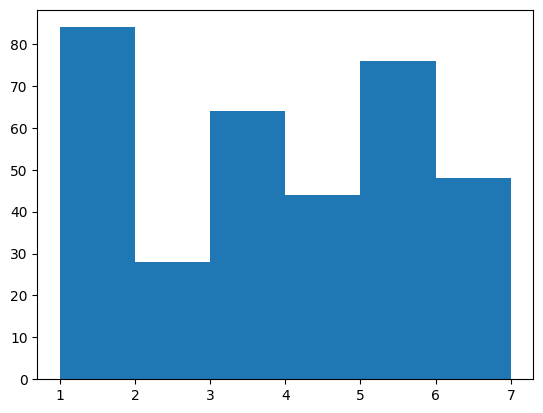

In [18]:
plt.hist(Y, bins=[1,2,3,4,5,6,7])

In [19]:
np.random.seed(40)

train_idx = []
test_idx = []
for i in range(1,7):
    (temp, ) = np.where(Y == i)
    temp_size = len(temp)
    
    print(len(temp))
    
    print(temp)
    
    train_size = 20
    test_size = 8
    
    # for train
    
    rand_select = np.random.choice(temp_size, train_size, replace=False)
    
    for idx in temp[rand_select]:
        train_idx.append(idx)
    
    
    # for test
    
    left_over = np.array(list(set(temp) - set(temp[rand_select])))
    print(left_over)
    
    leftover_size = len(left_over)
    
    rand_select = np.random.choice(leftover_size, test_size, replace=False)
    print(left_over[rand_select]) 
    
    for idx in left_over[rand_select]:
        test_idx.append(idx)
    
train_idx = np.array(train_idx)
test_idx = np.array(test_idx)

84
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 124 125 126 127 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211]
[  1   2   3   4   5   6   7   8  12  13  14  15  16  18  19  21  22  23
  24  25  26  27  28  29  30  31  34  35  37  39  85  86  87  88  89  90
  91  92  93  94  96  97  99 100 101 102 103 124 125 127 193 194 195 198
 199 201 202 203 204 207 208 209 210 211]
[ 23 202  24 207  12 124   2  18]
28
[104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 128 129 130 131 144 145 146 147]
[130 104 111 146 117 120 121 122]
[120 146 117 104 111 122 130 121]
64
[ 68  69  70  71  72  73  74  75  80  81  82  83 132 133 134 135 136 137
 138 139 148 149 150 151 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 

In [20]:

# train_idx = np.random.choice(size, train_size, replace=False)
# test_idx = np.array(list(set(range(size)) - set(train_idx)))

RGB_idx = np.array([0,3,7])

X_train = X[:, train_idx].T
X_train_rgb = X[RGB_idx][:, train_idx].T
Y_train = Y[train_idx]

X_test = X[:,test_idx].T
X_test_rgb = X[RGB_idx][:,test_idx].T
Y_test = Y[test_idx]

(array([20., 20., 20., 20., 20., 20.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

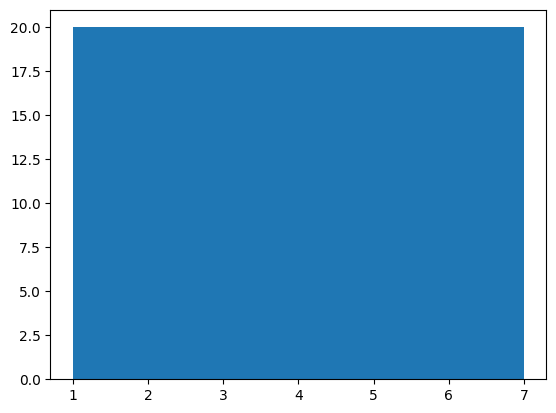

In [21]:
plt.hist(Y_train, bins=[1,2,3,4,5,6,7])

In [22]:
X_test.shape

(48, 8)

## 1.2. load the model
### 1.2.1 Logistic Regression

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Full
model_LR_1 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter = 100)
model_LR_1.fit(X_train, Y_train)
y_pred = model_LR_1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"full_Accuracy: {accuracy:.2f}")


# RGB
model_LR_2 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter = 100)
model_LR_2.fit(X_train_rgb, Y_train)
y_pred = model_LR_2.predict(X_test_rgb)
accuracy = accuracy_score(Y_test, y_pred)
print(f"rgb_Accuracy: {accuracy:.2f}")

full_Accuracy: 0.79
rgb_Accuracy: 0.81


full_Accuracy: 0.79


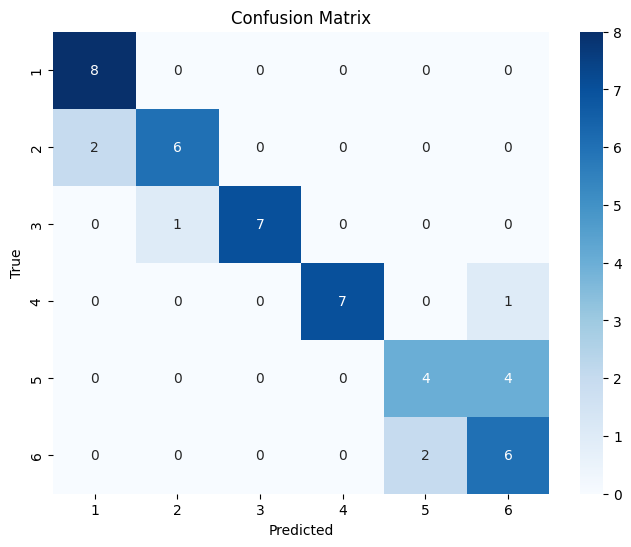

rgb_Accuracy: 0.81


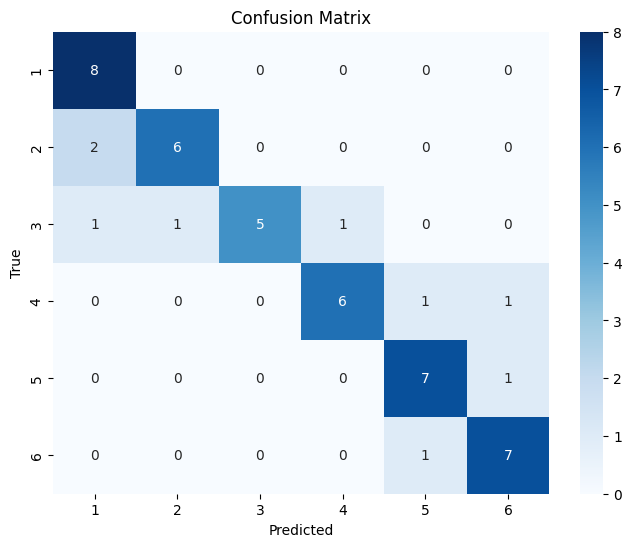

In [25]:
# Full
model_LR_1 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter = 100)
model_LR_1.fit(X_train, Y_train)
y_pred = model_LR_1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"full_Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# RGB
model_LR_2 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter = 100)
model_LR_2.fit(X_train_rgb, Y_train)
y_pred = model_LR_2.predict(X_test_rgb)
accuracy = accuracy_score(Y_test, y_pred)
print(f"rgb_Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### 1.2.2. KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Create a k-Nearest Neighbors classifier for multi-class classification
k = 5  # Number of neighbors

# Full
model_KNN_1 = KNeighborsClassifier(n_neighbors=k)
model_KNN_1.fit(X_train, Y_train)
y_pred = model_KNN_1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"full_Accuracy: {accuracy:.2f}")

# RGB
model_KNN_2 = KNeighborsClassifier(n_neighbors=k)
model_KNN_2.fit(X_train_rgb, Y_train)
y_pred = model_KNN_2.predict(X_test_rgb)
accuracy = accuracy_score(Y_test, y_pred)
print(f"rgb_Accuracy: {accuracy:.2f}")

full_Accuracy: 0.75
rgb_Accuracy: 0.67


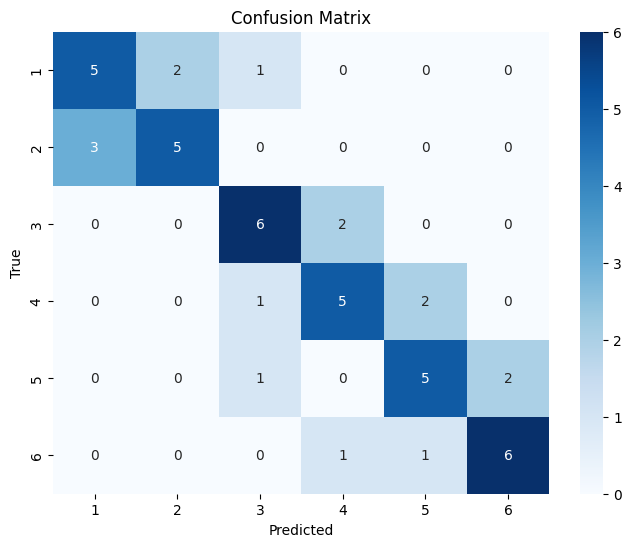

In [28]:
cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 1.2.3. SVM

In [29]:
from sklearn.svm import SVC

full_Accuracy: 0.83


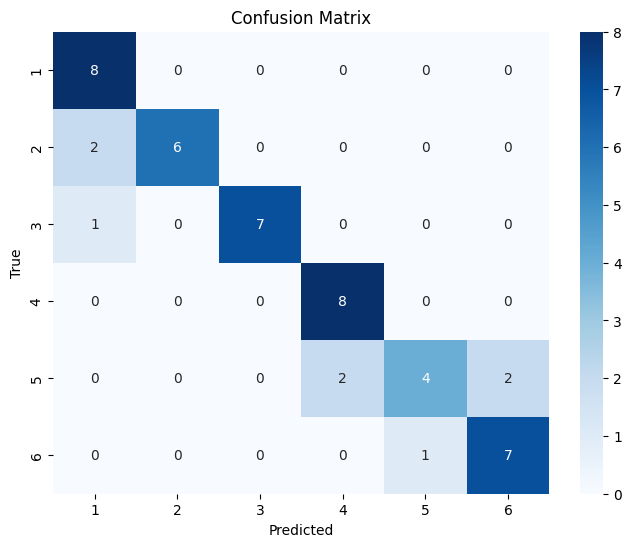

rgb_Accuracy: 0.83


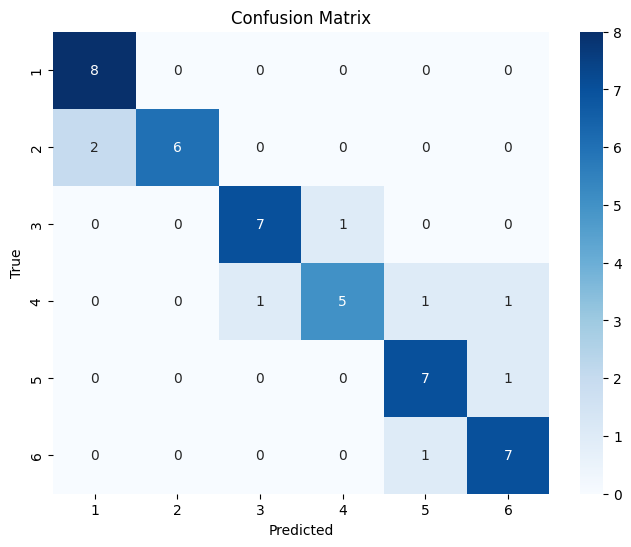

In [30]:
# Full
model_SVM_1 = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and C values
model_SVM_1.fit(X_train, Y_train)
y_pred = model_SVM_1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"full_Accuracy: {accuracy:.2f}")

cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# RGB
model_SVM_2 = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and C values
model_SVM_2.fit(X_train_rgb, Y_train)
y_pred = model_SVM_2.predict(X_test_rgb)
accuracy = accuracy_score(Y_test, y_pred)
print(f"rgb_Accuracy: {accuracy:.2f}")


cm = confusion_matrix(Y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Partial Least Square

In [31]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Chlorophyll

In [32]:
Y = np.array(chlorophyll_concentration)

RGB_idx = np.array([0,3,7])

X_train = X[:, train_idx].T
X_train_rgb = X[RGB_idx][:, train_idx].T
Y_train = Y[train_idx]

X_test = X[:,test_idx].T
X_test_rgb = X[RGB_idx][:,test_idx].T
Y_test = Y[test_idx]

In [33]:
Y_train.shape

(120,)

Mean Squared Error: 8.24036622663463
R^2 Score: 0.6904354077899442


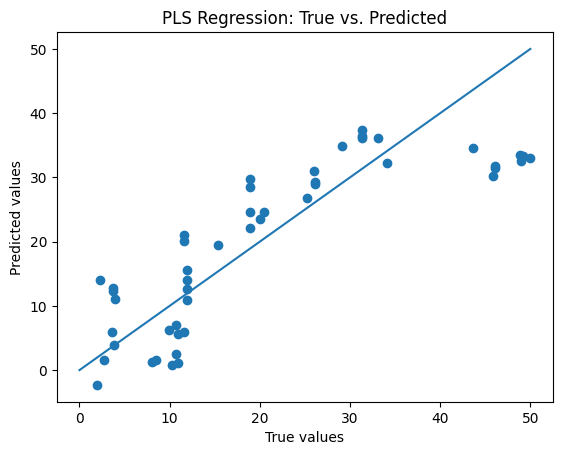

In [34]:
# Initialize the PLS regression model with a specified number of components
n_components = 2
pls = PLSRegression(n_components=n_components)

# Fit the model on the training data
pls.fit(X_train, Y_train)

# Predict the target variable on the test data
y_pred = pls.predict(X_test)

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'R^2 Score: {r2}')

# Plot the predicted vs. true values
plt.scatter(Y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('PLS Regression: True vs. Predicted')
plt.plot([0,np.max(Y_test)], [0,np.max(Y_test)])
plt.show()

Mean Squared Error: 8.580944668775826
R^2 Score: 0.6643176887400442


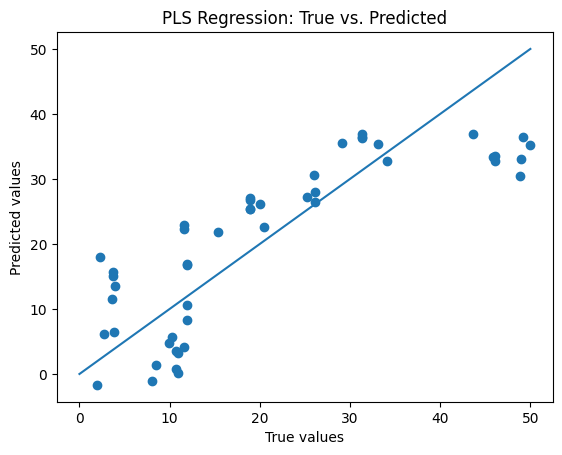

In [35]:
# Initialize the PLS regression model with a specified number of components
n_components = 2
pls = PLSRegression(n_components=n_components)

# Fit the model on the training data
pls.fit(X_train_rgb, Y_train)

# Predict the target variable on the test data
y_pred = pls.predict(X_test_rgb)

y_pred = y_pred.flatten()

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'R^2 Score: {r2}')

# Plot the predicted vs. true values
plt.scatter(Y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('PLS Regression: True vs. Predicted')
plt.plot([0,np.max(Y_test)], [0,np.max(Y_test)])
plt.show()

## Lycopene

In [36]:
Y = np.array(lycopene_concentration)

RGB_idx = np.array([0,3,7])

X_train = X[:, train_idx].T
X_train_rgb = X[RGB_idx][:, train_idx].T
Y_train = Y[train_idx]

X_test = X[:,test_idx].T
X_test_rgb = X[RGB_idx][:,test_idx].T
Y_test = Y[test_idx]

In [37]:
Y_test

array([ 0.4153354 ,  0.31056742,  0.        ,  0.45593611,  1.57334152,
        2.23406943,  1.64925619,  1.58188228,  4.27896937,  7.31522611,
        3.97671744,  3.81421535,  7.26145533,  4.27896937,  4.65110062,
        4.27896937, 14.51463896,  7.57755339, 16.03876065, 16.04711142,
       16.12097187,  9.40769013, 16.04711142, 14.96017873, 23.1142191 ,
       23.19009113, 23.19009113, 24.85244383, 23.1142191 , 24.9193599 ,
       24.85244383, 19.64557187, 29.04178273, 31.0140308 , 27.93715343,
       28.90312967, 27.68533333, 39.81613223, 32.36764462, 38.05535469,
       58.25885659, 65.80428276, 70.        , 60.29138753, 59.22895728,
       59.61724256, 59.61724256, 68.41665265])

In [38]:
Y_train.shape

(120,)

Mean Squared Error: 11.358818596500615
R^2 Score: 0.7017293130227447


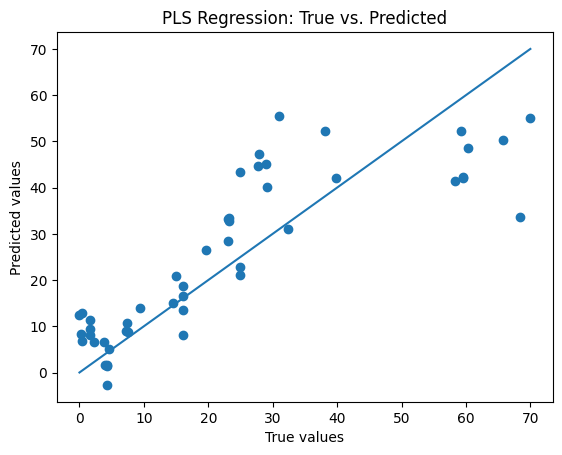

In [39]:
# Initialize the PLS regression model with a specified number of components
n_components = 2
pls = PLSRegression(n_components=n_components)

# Fit the model on the training data
pls.fit(X_train, Y_train)

# Predict the target variable on the test data
y_pred = pls.predict(X_test)

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'R^2 Score: {r2}')

# Plot the predicted vs. true values
plt.scatter(Y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('PLS Regression: True vs. Predicted')
plt.plot([0,np.max(Y_test)], [0,np.max(Y_test)])
plt.show()

Root Mean Squared Error: 13.29546855852598
R^2 Score: 0.5913499639621593


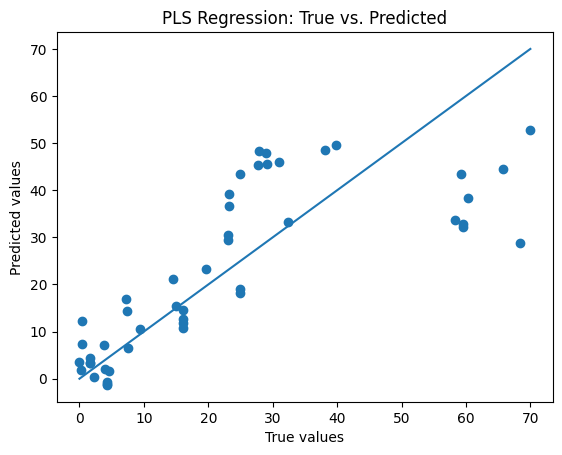

In [40]:
# Initialize the PLS regression model with a specified number of components
n_components = 2
pls = PLSRegression(n_components=n_components)

# Fit the model on the training data
pls.fit(X_train_rgb, Y_train)

# Predict the target variable on the test data
y_pred = pls.predict(X_test_rgb)

# Calculate and print the mean squared error on the test set
mse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {mse}')

r2 = r2_score(Y_test, y_pred)
print(f'R^2 Score: {r2}')

# Plot the predicted vs. true values
plt.scatter(Y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('PLS Regression: True vs. Predicted')
plt.plot([0,np.max(Y_test)], [0,np.max(Y_test)])
plt.show()